# MultiClass Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('iris')

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df.species = le.fit_transform(df.species)

In [10]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [11]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
le.inverse_transform([0])

array(['setosa'], dtype=object)

In [13]:
x = df.drop(columns=['species'])
y=df.species

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)

In [16]:
type(x_test)

pandas.core.frame.DataFrame

In [17]:
x_train.shape

(120, 4)

In [18]:
import xgboost as xgb

In [19]:
xgb_model = xgb.XGBClassifier()

In [20]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
y_test_pred = xgb_model.predict(x_test)

In [23]:
y_test_pred

array([1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 0, 0, 0, 2], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [25]:
cm = confusion_matrix(y_test,y_test_pred)

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)

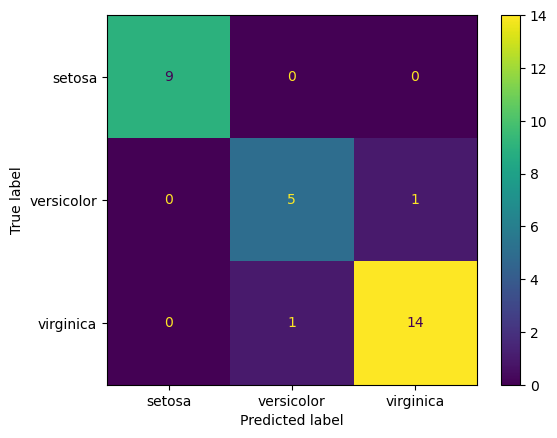

In [27]:
disp.plot()

<Axes: >

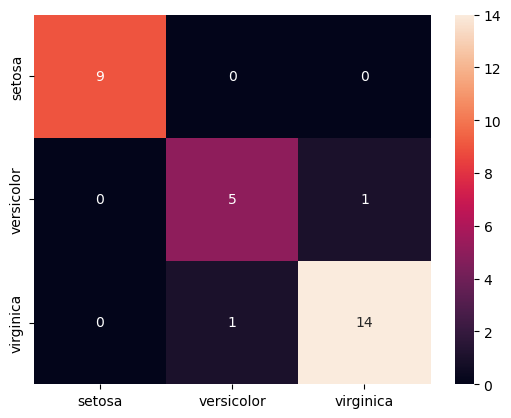

In [31]:
sns.heatmap(cm,annot=True,xticklabels=le.classes_,yticklabels=le.classes_)

In [32]:
from sklearn.metrics import accuracy_score,classification_report

In [34]:
cr = classification_report(y_test,y_test_pred)

In [35]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [36]:
type(cr)

str